> ### EEE3314: Introduction to Artificial Intelligence

# Assignment III:  Neural Networks

### *Assignement Instructions:*
- **Due date**: 11:55 PM, Dec. 22 (Sun), 2024
- **File name**: [ID_Name_HW3.ipynb]
- Complete project3.py with comments describing your implementation after reading instructions in this file.
- **Respond to all the questions that requires you to answer with markdown, theoretically and empirically**

In [3]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2024-12-20 20:42:46.382868


In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Problem statement

We will implement a simple neural network for classification. Let's first see how a simple logistic regression method works on the $\text{moon}$ dataset. This dataset has been widely used to evaluate performance of a nonlinear classifier or clustering methods. We can synthetically generate the dataset with labels from the $\texttt{sklearn.linear_model}$. See the example shown below. 

In [7]:
from project3 import *

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16

In [9]:
# dataset
np.random.seed(0)
X_train, y_train = sklearn.datasets.make_moons(300, noise = 0.25)

Let's viaualize the $\texttt{moon}$ dataset with the $\texttt{scatter}$ function from $\texttt{matplotlib.pyplot}$.

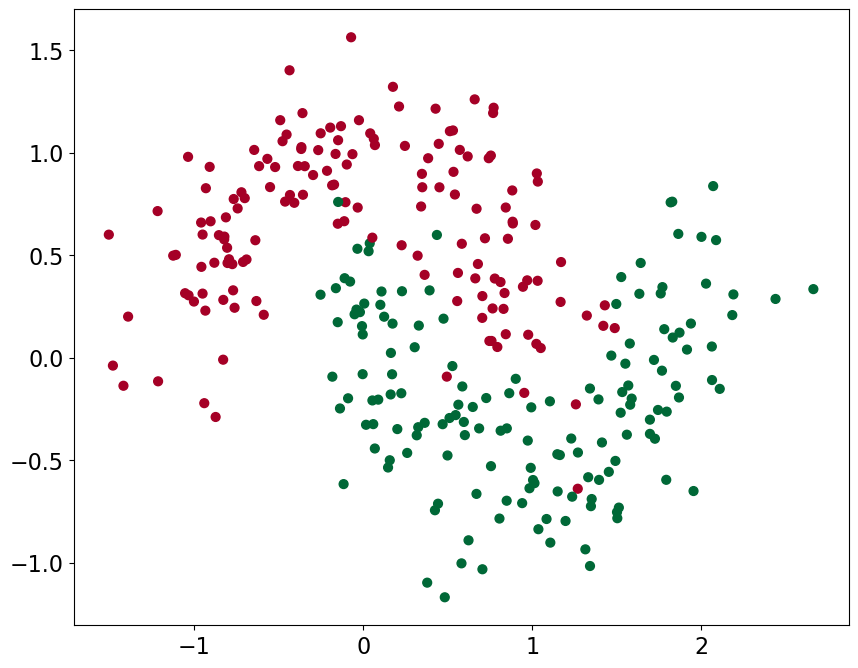

In [11]:
plt.scatter(X_train[:,0], X_train[:,1], s = 40, c=y_train, cmap=plt.cm.RdYlGn)

It is not feasible to classify samples in the dataset using classifiers with linear features. That is, drawing a straight line (i.e., decision boundaries) to divide training samples into two different regions is not feasible. 

The $\texttt{sklearn.linear_model}$ provides a set of linear models. See the following webpage: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html. 

In [13]:
import sklearn.linear_model

Let's apply logistic regression to the $\texttt{moon}$ dataset and draw decision boundaries. You can use the help function ($\texttt{plot_decision_boundary}$) that takes three values (or functions) as inputs. $\texttt{pred_func}$ is an output of the classifiers, e.g., the output value of the sigmoid function in case of logistic regression. Other two arguments, $\texttt{train_data}$ and $\texttt{color}$, are the training dataset and color for each label in the dataset, respectively. See the example below.

In [15]:
# logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X_train, y_train)

LogisticRegressionCV()

Text(0.5, 1.0, 'Logistic Regression')

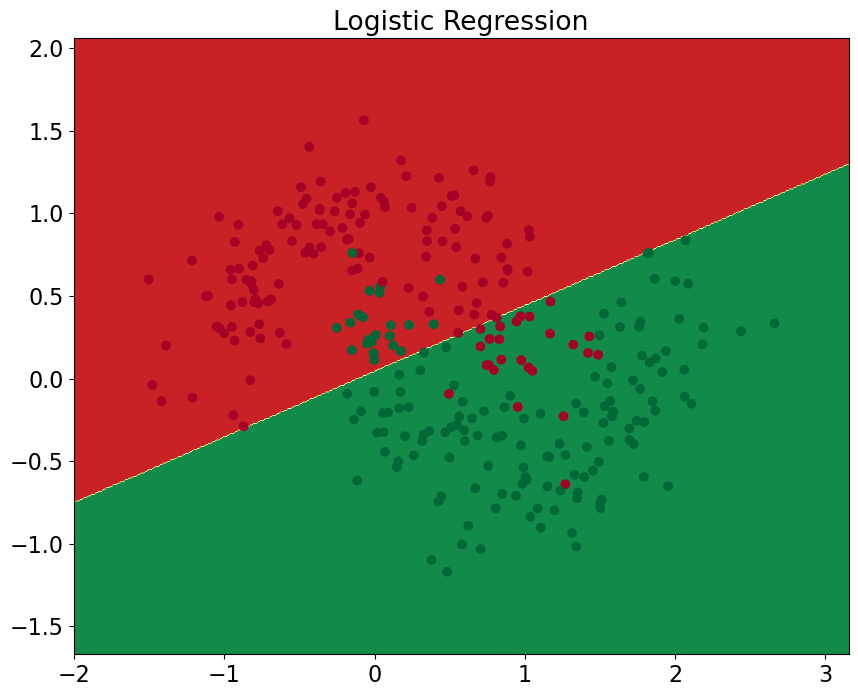

In [16]:
# plot boundary
plot_decision_boundary(pred_func=clf.predict, train_data = X_train, color = y_train)
plt.title("Logistic Regression")

In [17]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")

X_train.shape: (300, 2)
y_train.shape: (300,)


As you can see, we should exploit nonlinear features or nonlinear classifiers to classify such datasets. Let's implement a classifier exploiting nonlinear features with a simple neural network, and apply it to classify samples in the $\texttt{moon}$ dataset. The neural network we will implement consists of series of fully connected layers followed by nonlinear activation functions. 

### P1. Implement neural networks (Flat implementation) (40 points)
Implement a multilayer perceptron method (```class NeuralNetwork```) using gradient descent. A detailed description of the nework is shown below. Plot a decision boundary on the $\texttt{moon}$ dataset. Plot training losses and training accuracy over the number of epochs. 

 > $H_1 = X \cdot W_1 + b_1$   
 > $z_1 = ReLU(H_1)$ where $ReLU$($=\max(0,x)$) is a rectified linear unit and $z_1$ is an output of the first hidden layer.  
 > $H_2 = z_1 \cdot W_2 + b_2$   
 > $z_2 = LeakyReLU(H_2)$ where $LeakyReLU$($=\max(0.01x,x)$) and $z_2$ is an output of the second hidden layer.  
 > $H_3 = z_2 \cdot W_3 + b_3$   
 > $z_3 = tanh(H_3 + H_1)$ where $\tanh$ is a tanh function and $z_3$ is an output of the third hidden layer.    
 > $H_4 = z_3 \cdot W_4 + b_4$   
 > $\hat y = \sigma(H_4)$ where $\sigma$ is a sigmoid function unit and $\hat y$ is an output of the network.
 
 
Note that sigmoid function is typically used for binary classification to obtain scores of $[0,1]$. 
 
 > **$W$** and **$b$** are weights and bias, respectively.    
 > **Initialization for weight**: Standard normal (use $\texttt{np.random.randn}$.)  
 > **Initialization for bias (intercept)**: 0     
 > **Input size**: 2  
 > **The first hidden layer size**: 10  
 > **The second hidden layer size**: 10  
 > **Output size**: 1   
 > **Regularization parameter $\lambda$**: 0.001  
 > **Loss function**: Binary cross entropy loss (or equivently log loss). For each training sample, we define a log loss function as follows:
 >
 > $L = -y\log \hat{y} -(1-y)\log(1-\hat{y})$
 >
 > where $y$ is a ground truth that has the value of 0 or 1.   
 > **Total loss** : summation of the losses for the entire training samples and L2 normalized weights for regularization, as follows:
 >
 > $L_{total} = -\sum_{i=1}^N{ (-y^{(i)}\log \hat{y}^{(i)} -(1-y^{(i)})\log(1-\hat{y}^{(i)})) } +  \lambda \|W\|^2 $  
 >
 > where $y^{(i)}$ and $\hat{y}^{(i)}$ are the ground truth and the output of the network of i-th sample respectively.  
 > **Optimization**: Gradient descent  
 > **Learning rate** = 0.0001  
 > **Number of epochs** = 50000

### P2. Implement neural networks (Modular implementation) (40 points)

Implement ```class Linear```, ```class ReLU```, ```class LeakyReLU```, ```class Tanh```, ```class Sigmoid```, ```class Dropout```, ```class GradientDescent```, ```class Momentum``` and ```class NeuralNetwork_module```.

We will implement a multilayer perceptron method with modular functions, similar to the generic deep learning libraries such as `PyTorch` and `TensorFlow`.  To perform classification using ```class NeuralNetwork_module```, we define `forward` and `backward` operations for each layer (e.g., ReLU, a linear layer (i.e., y=Wx), Tanh, or a sigmoid layer), whose inputs and ouputs are matrices. Note that a linear layer (```Linear``` class) also inputs an additinal weight matrix. Note also that we should chche data needed for a backward pass in `forward` operations.


Please see the description for `forward` and `backward` operations in the linear layer (```class Linear```) below.
```python
class Layer(Object):
    @staticmethod
    def forward(x):
      """ Receive inputs x and weights w """
      # Do some computations ...
      z = # ... some intermediate value
      # Do some more computations ...
      out = # the output

      cache = (x, out) # Values we need to compute gradients

      return out, cache

    @staticmethod
    def backward(dout, cache):
      """
      Receive dout (derivative of loss with respect to outputs) and cache,
      and compute derivative with respect to inputs.
      """
      # Unpack cache values
      x, out = cache
    
      # Use values in cache to compute derivatives
      dx = # Derivative of loss with respect to x
     
      return dx
```



A detailed description of the nework is shown below. Plot a decision boundary on the $\texttt{moon}$ dataset. Plot training losses and training accuracy over the number of epochs. 
 > $H_1 = X \cdot W_1 + b_1$   
 > $z_1 = ReLU(H_1)$ where $ReLU$($=\max(0,x)$) is a rectified linear unit and $z_1$ is an output of the first hidden layer.  
 > $z_1 = Dropout(z_1)$  
 > $H_2 = z_1 \cdot W_2 + b_2$   
 > $z_2 = LeakyReLU(H_2)$ where $LeakyReLU$($=\max(0.01x,x)$) and $z_2$ is an output of the first hidden layer.  
 > $z_2 = Dropout(z_2)$  
 > $H_3 = z_2 \cdot W_3 + b_3$   
 > $z_3 = tanh(H_3 + H_1)$ where $\tanh$ is a tanh function and $z_3$ is an output of the second hidden layer.    
 > $z_3 = Dropout(z_3)$  
 > $H_4 = z_3 \cdot W_4 + b_4$   
 > $\hat y = \sigma(H_4)$ where $\sigma$ is a sigmoid function unit and $\hat y$ is an output of the network.


 > **Dropout rate**: 0.1  
 > **Optimizer**: Gradient Descent and Gradient Descent with Momentum  
 > **Other things:**: Same with P1  

### P1. Implement neural networks (Flat implementation) (40 points)

In [24]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 1
nn_hdim1 = 10
nn_hdim2 = 10
nn_hdim3 = 10
lr = 0.0001 
L2_norm = 0.001
epoch = 50000

model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_hdim3, nn_output_dim, init="random")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=True)

Loss (epoch 1000): 51.55551550579247
Loss (epoch 2000): 35.22338562703276
Loss (epoch 3000): 32.028354432700056
Loss (epoch 4000): 30.65198970536353
Loss (epoch 5000): 29.34227826299587
Loss (epoch 6000): 28.6968438422197
Loss (epoch 7000): 27.9155578422348
Loss (epoch 8000): 26.250487782849568
Loss (epoch 9000): 25.280979310989142
Loss (epoch 10000): 24.680553923706718
Loss (epoch 11000): 23.952868005928742
Loss (epoch 12000): 23.381512105277984
Loss (epoch 13000): 22.709379595823453
Loss (epoch 14000): 22.341478315525723
Loss (epoch 15000): 21.750639186207316
Loss (epoch 16000): 21.159207387826456
Loss (epoch 17000): 20.71565524642728
Loss (epoch 18000): 20.063470183769688
Loss (epoch 19000): 19.554694908184693
Loss (epoch 20000): 18.984627260170804
Loss (epoch 21000): 18.410225729976567
Loss (epoch 22000): 17.878184379621313
Loss (epoch 23000): 17.455041664115978
Loss (epoch 24000): 16.985062118279103
Loss (epoch 25000): 16.471045715214427
Loss (epoch 26000): 14.644330329505094
Loss

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

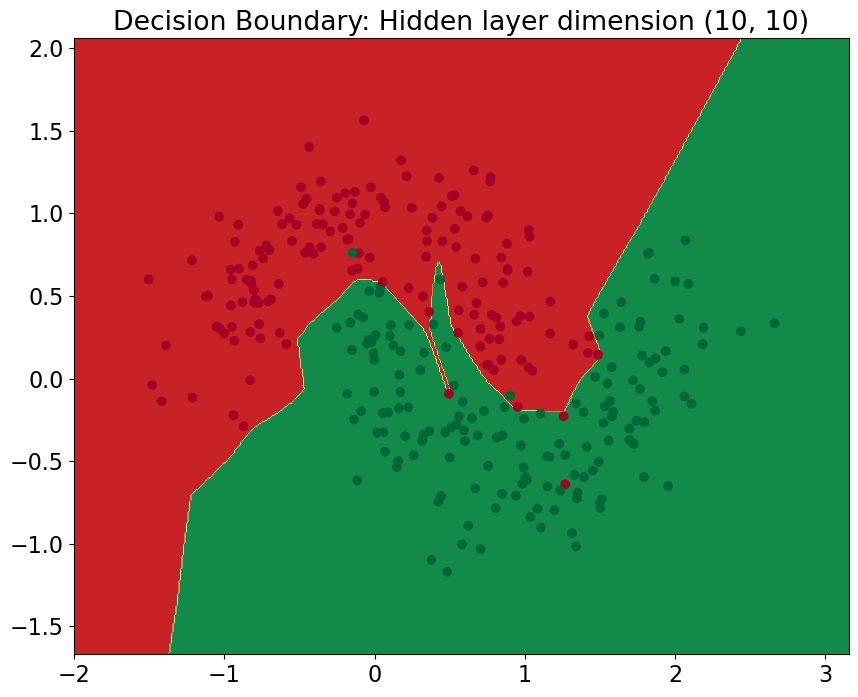

In [25]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

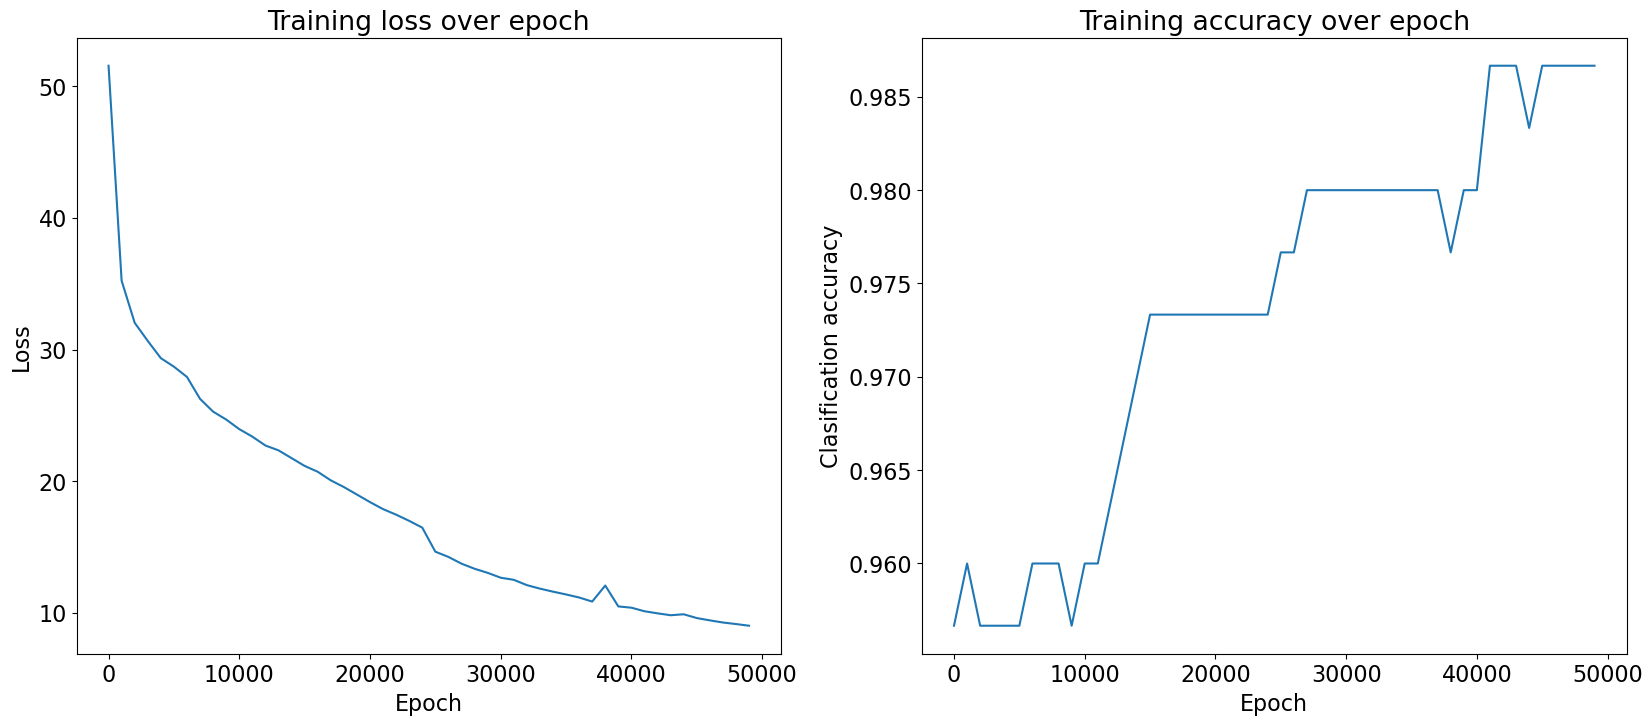

In [26]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.gcf().set_size_inches(20, 8)

### P2. Implement neural networks (Modular implementation) (40 points)

In [28]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 1
nn_hdim1 = 10
nn_hdim2 = 10
nn_hdim3 = 10
dropout_rate = 0.01
lr = 0.0001 
L2_norm = 0.001
momentum = 0.9
epoch = 50000

# model = NeuralNetwork_module(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
model = NeuralNetwork_module(nn_input_dim, nn_hdim1, nn_hdim2, nn_hdim3, nn_output_dim, dropout_rate, init="random")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=True, momentum=momentum)

Loss (epoch 1000): 31.91592312562813
Loss (epoch 2000): 23.937057993022208
Loss (epoch 3000): 19.6951098677134
Loss (epoch 4000): 16.773811893997156
Loss (epoch 5000): 17.060430976972526
Loss (epoch 6000): 15.204884740415084
Loss (epoch 7000): 15.921394334082944
Loss (epoch 8000): 12.028713021330628
Loss (epoch 9000): 15.20360879277345
Loss (epoch 10000): 15.35486521314798
Loss (epoch 11000): 14.657005420870966
Loss (epoch 12000): 19.43166269189708
Loss (epoch 13000): 16.84192406497131
Loss (epoch 14000): 19.134161816003896
Loss (epoch 15000): 15.058426702718448
Loss (epoch 16000): 13.161863762565632
Loss (epoch 17000): 15.43215543663555
Loss (epoch 18000): 21.48255780586331
Loss (epoch 19000): 12.406270015219047
Loss (epoch 20000): 12.256153044897644
Loss (epoch 21000): 12.187096960154843
Loss (epoch 22000): 10.826722213122148
Loss (epoch 23000): 12.880774238608774
Loss (epoch 24000): 11.367780296243446
Loss (epoch 25000): 15.584957501123442
Loss (epoch 26000): 19.584718883160573
Loss

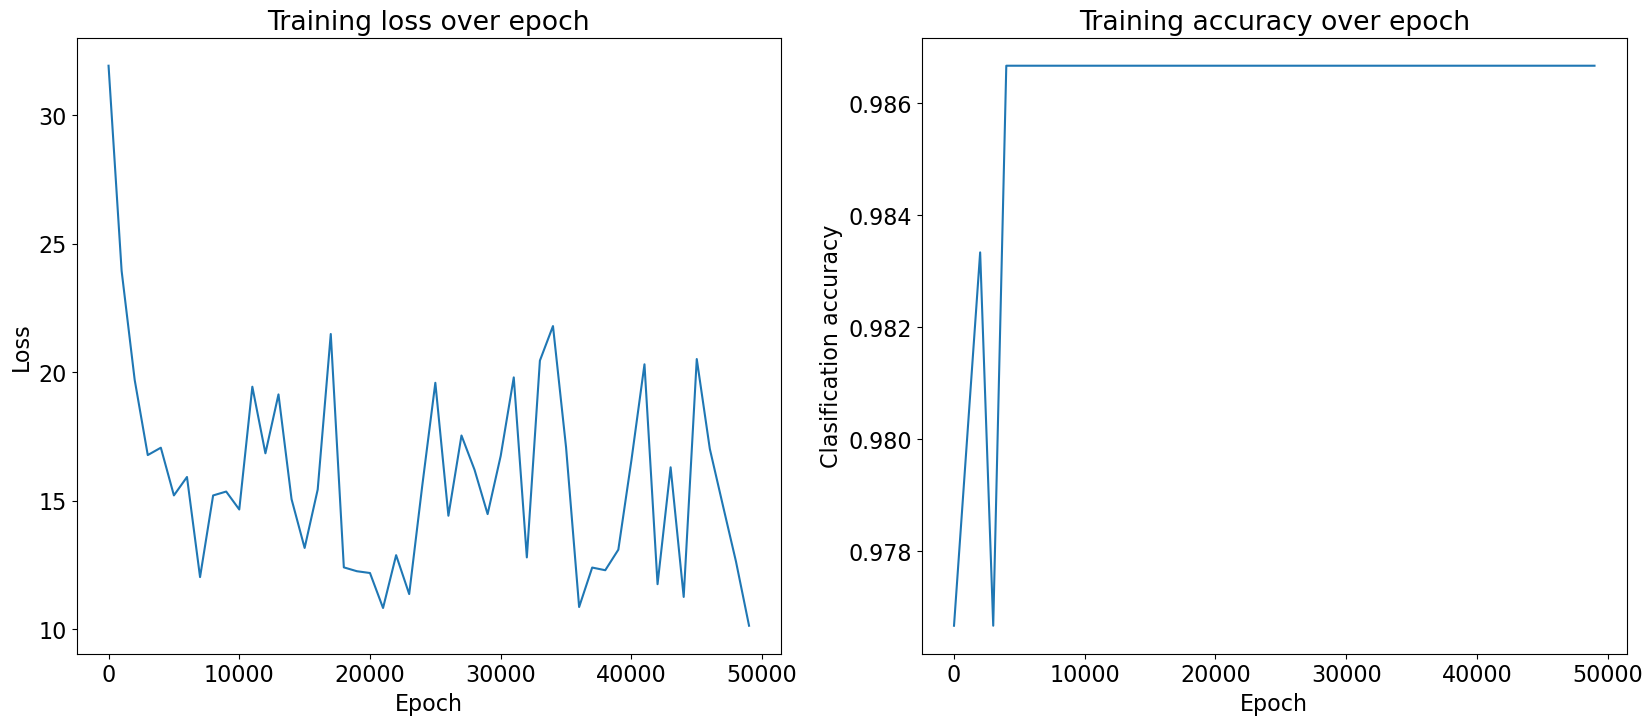

In [29]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.gcf().set_size_inches(20, 8)

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

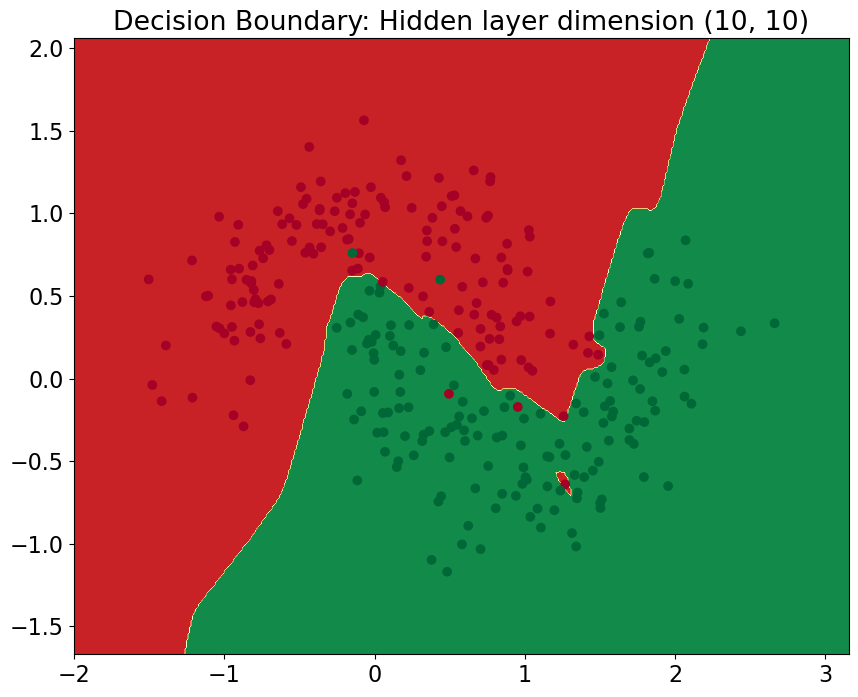

In [30]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

### P3. Analysis and discussion (20 points)

#### P3.1. Capacity (5 points)
Change the numbers of nodes in hidden layers as follows, and plot decision boundaries: (1,1), (2,2), (3,3), (4,4), (5,5), (20,20), (50,50) where the first and second elements are the numbers of nodes in the first and second hidden layers, respectively. 

**Observe and Analyze the effect of the capacity of hidden layer with respect to the performance.**

answer here

Learning NN: Hidden layer dimension (1, 1) ... done
Learning NN: Hidden layer dimension (2, 2) ... done
Learning NN: Hidden layer dimension (3, 3) ... done
Learning NN: Hidden layer dimension (4, 4) ... done
Learning NN: Hidden layer dimension (5, 5) ... done
Learning NN: Hidden layer dimension (20, 20) ... done
Learning NN: Hidden layer dimension (50, 50) ... done


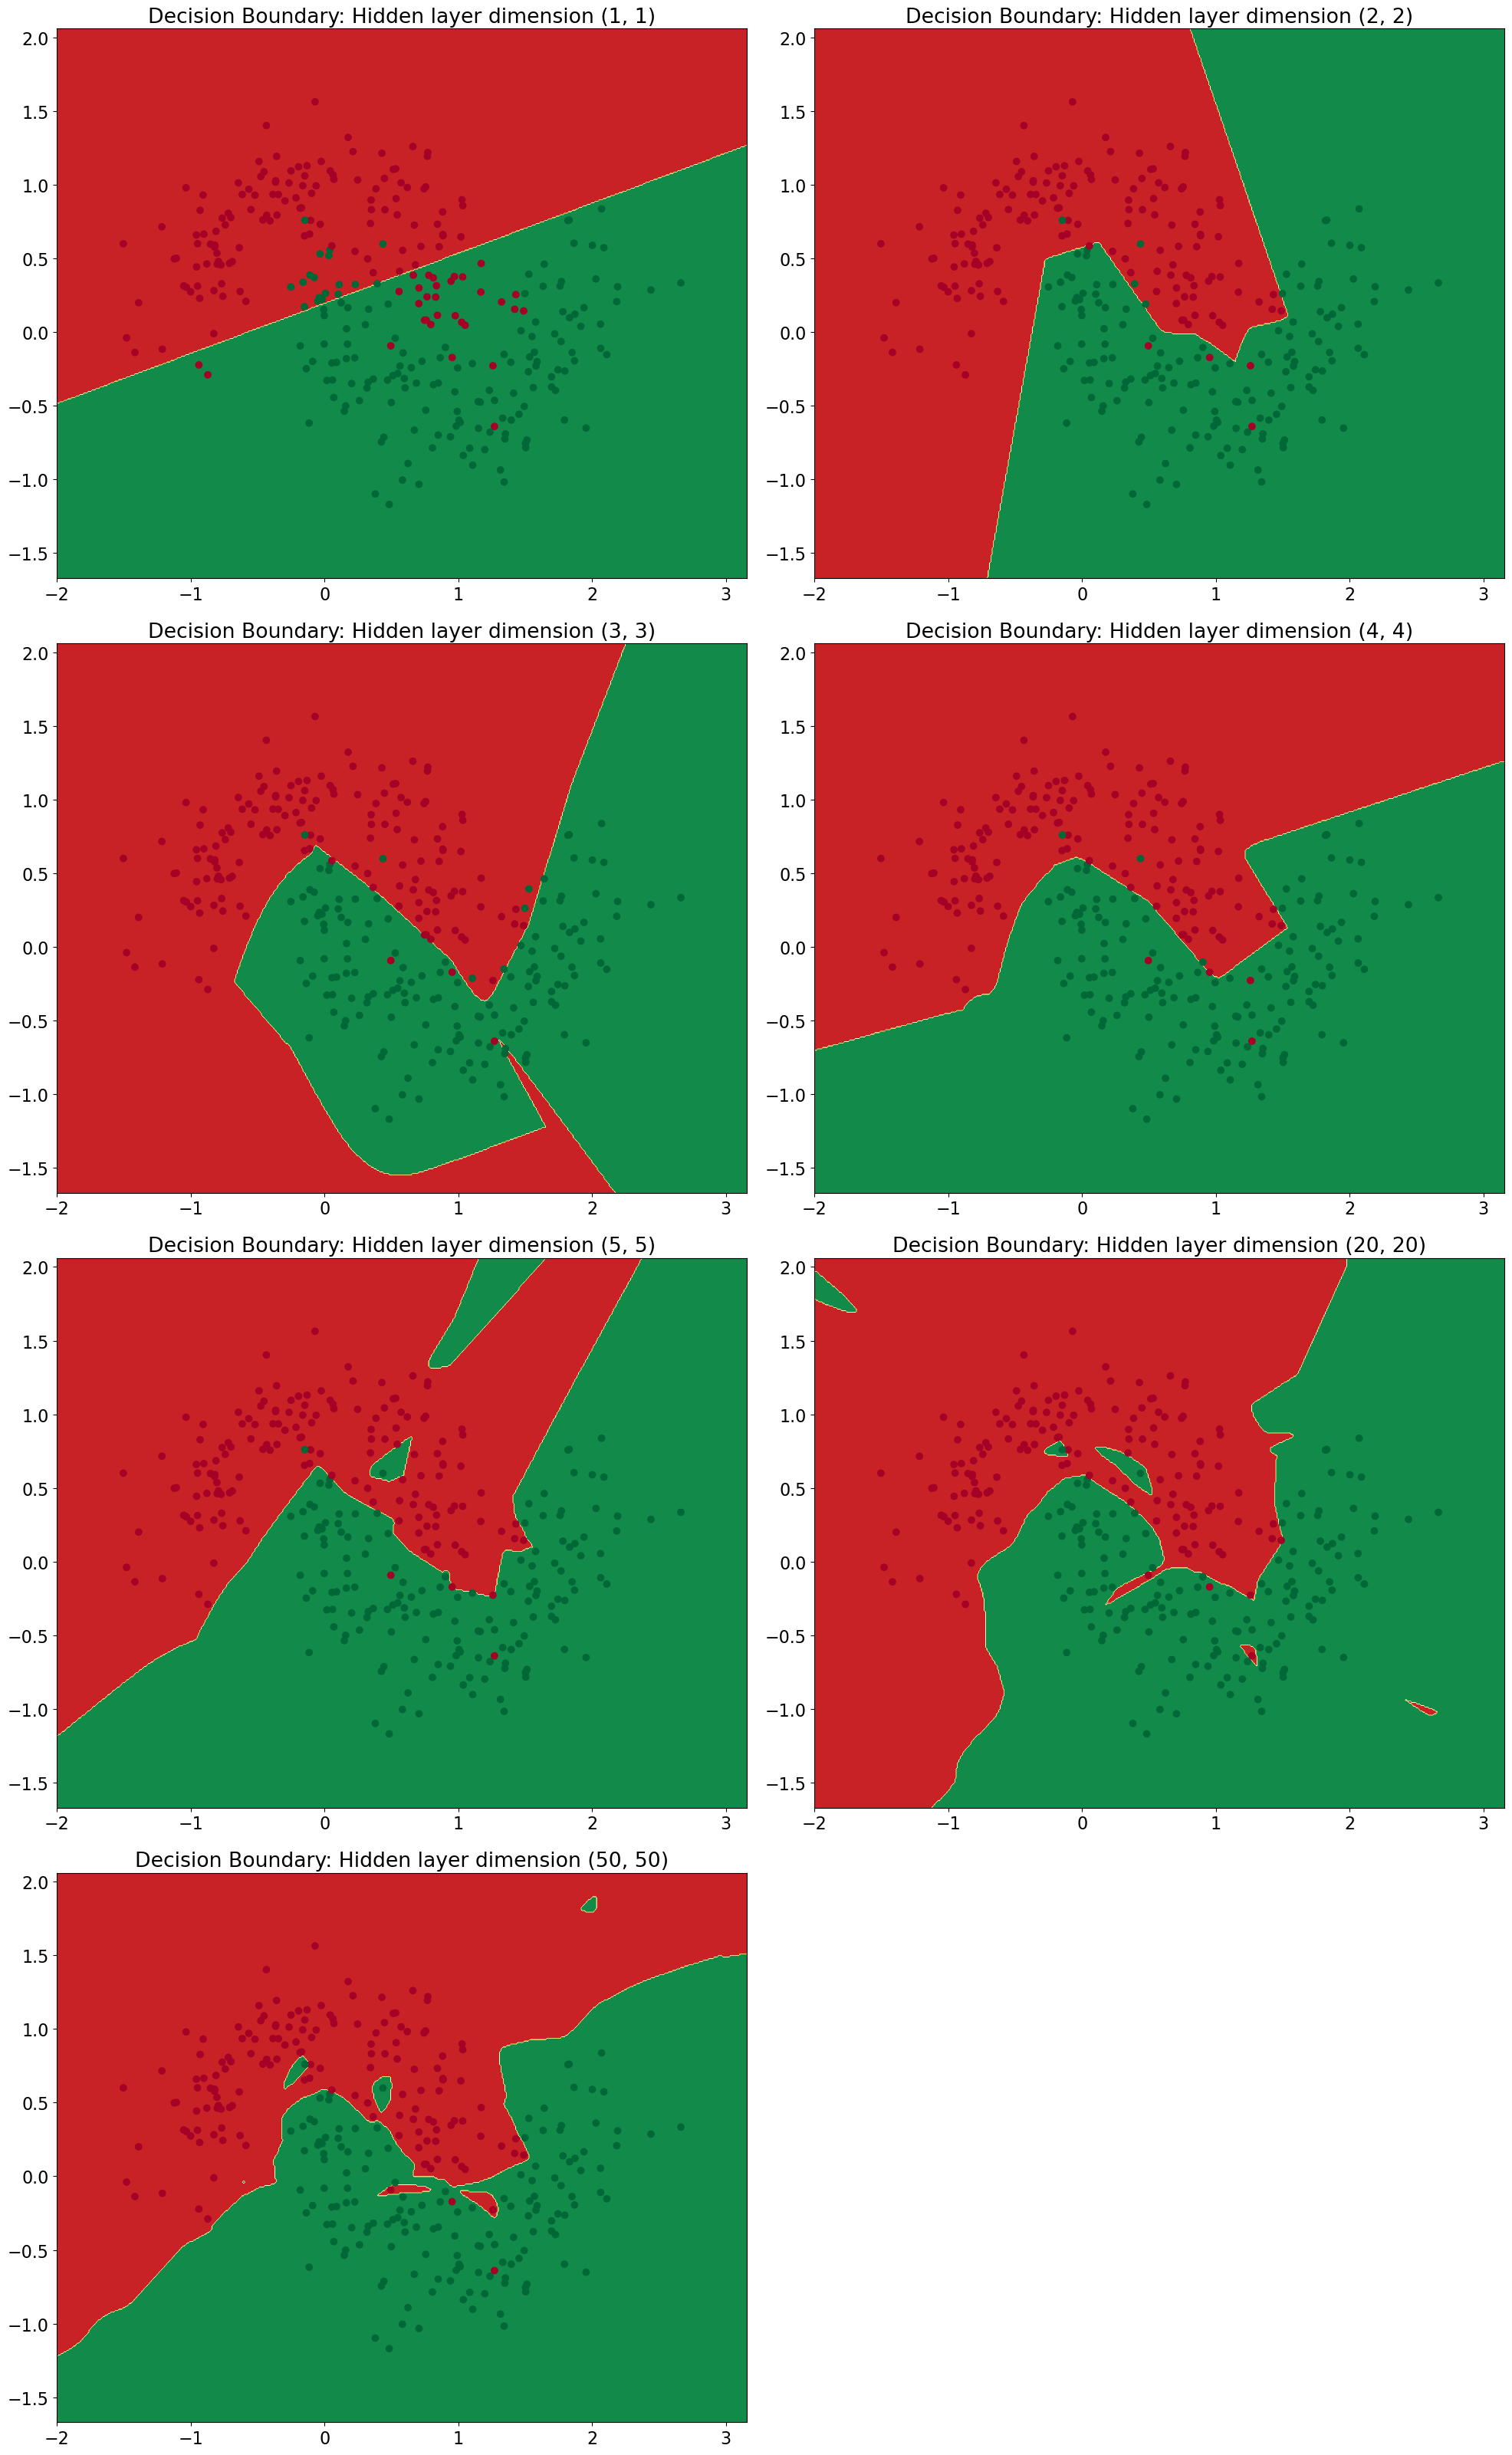

In [34]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 1
lr = 0.001 
epoch = 50000

hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim, nn_hdim}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_hdim, nn_output_dim, init="random")      
    stats = model.train(X_train, y_train, learning_rate=lr, epoch=epoch,  L2_norm=0.0, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Hidden layer dimension {nn_hdim, nn_hdim} ... done")

plt.gcf().set_size_inches(20, 40)
plt.tight_layout()
plt.show()

#### P3.2. Regularization (5 points)
Adjust the regularization parameter $\lambda$ as follows, and plot decision boundaries: \[0, 1e-5, 1e-3, 1e-1\].

**Observe and Analyze the effect of L2 regularization with respect to the performance.**

answer here

Learning NN: Regularization 0 ... done
Learning NN: Regularization 1e-05 ... done
Learning NN: Regularization 0.001 ... done
Learning NN: Regularization 0.1 ... done


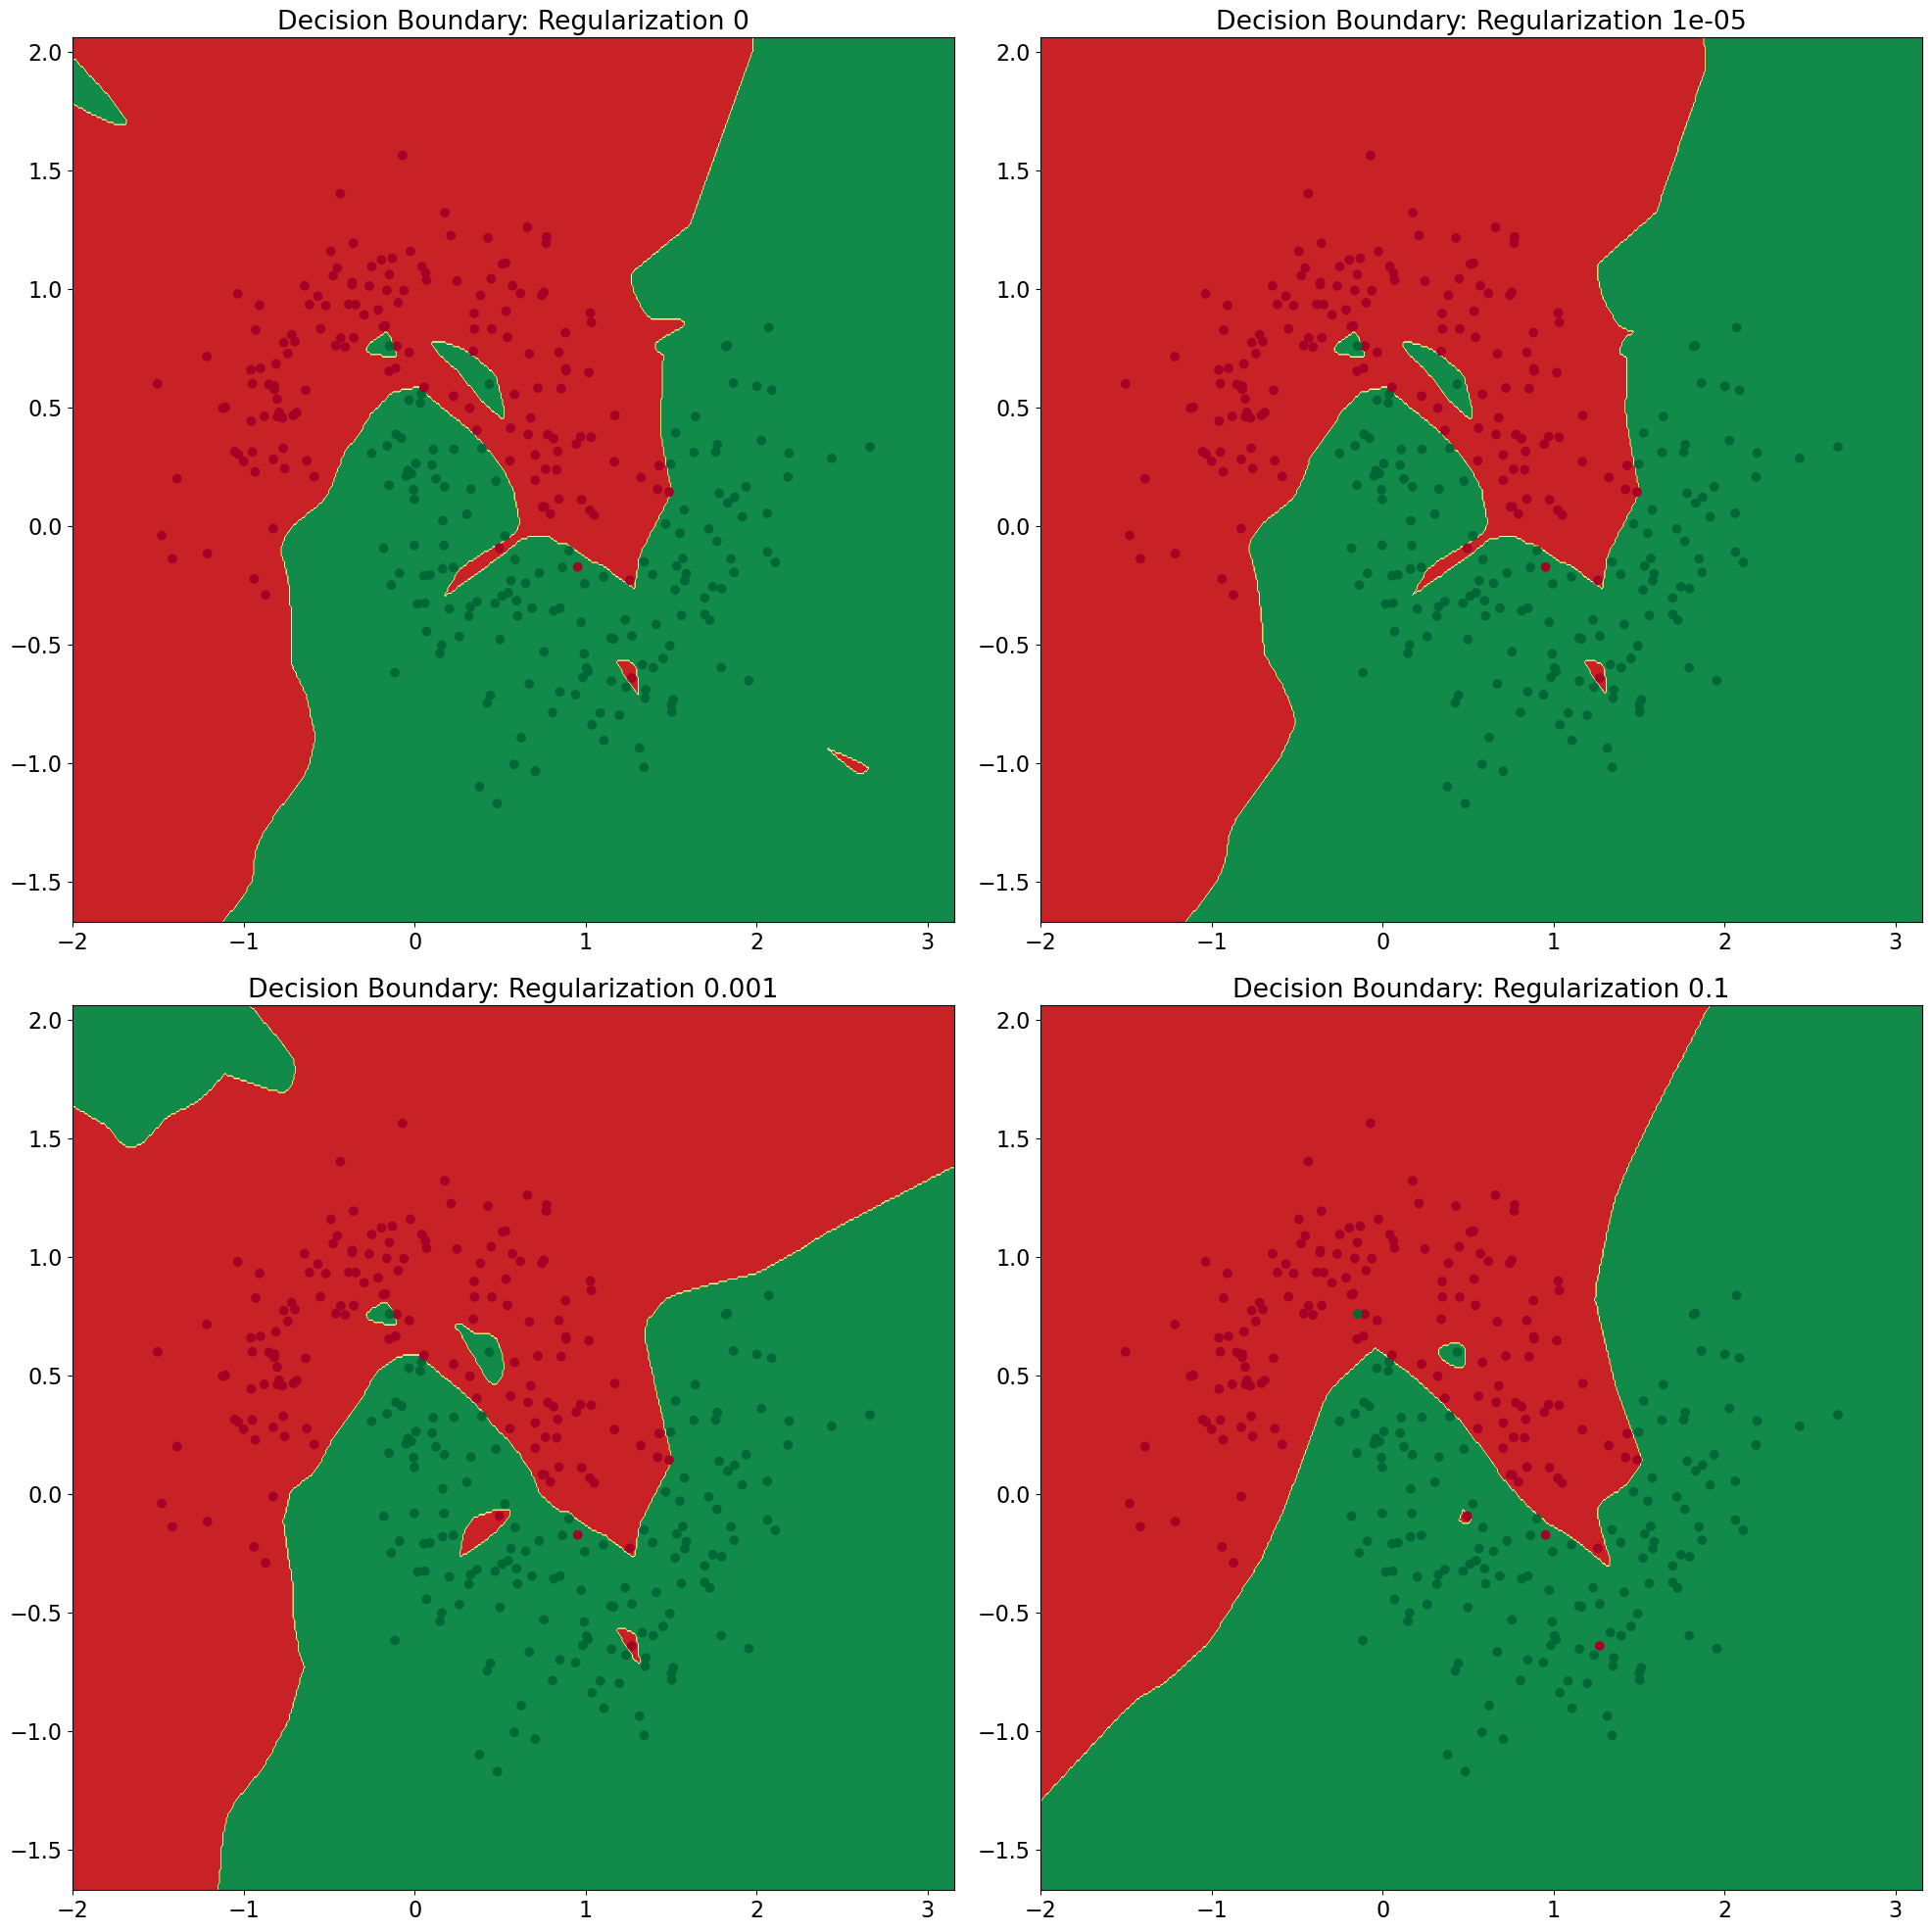

In [37]:
np.random.seed(0)

nn_input_dim = 2
nn_hdim = 20
nn_output_dim = 1
lr = 0.001 
epoch = 50000


L2_norm_list = [0, 1e-5, 1e-3, 1e-1]
for i, L2_norm in enumerate(L2_norm_list):
    plt.subplot(2, 2, i+1)
    plt.title(f"Decision Boundary: Regularization {L2_norm}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_hdim, nn_output_dim, init="random")      
    stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Regularization {L2_norm} ... done")
    
plt.gcf().set_size_inches(20, 20)
plt.tight_layout()
plt.show()

#### P3.3. Dropout (5 points)

Adjust the dropout rate as follows, and plot decision boundaries: \[0, 0.01, 0.1, 0.5\]. 

**Observe and Analyze the effect of dropout with respect to the performance.**


answer here

Learning NN: Dropout 0 ... done
Learning NN: Dropout 0.01 ... done
Learning NN: Dropout 0.1 ... done
Learning NN: Dropout 0.5 ... done


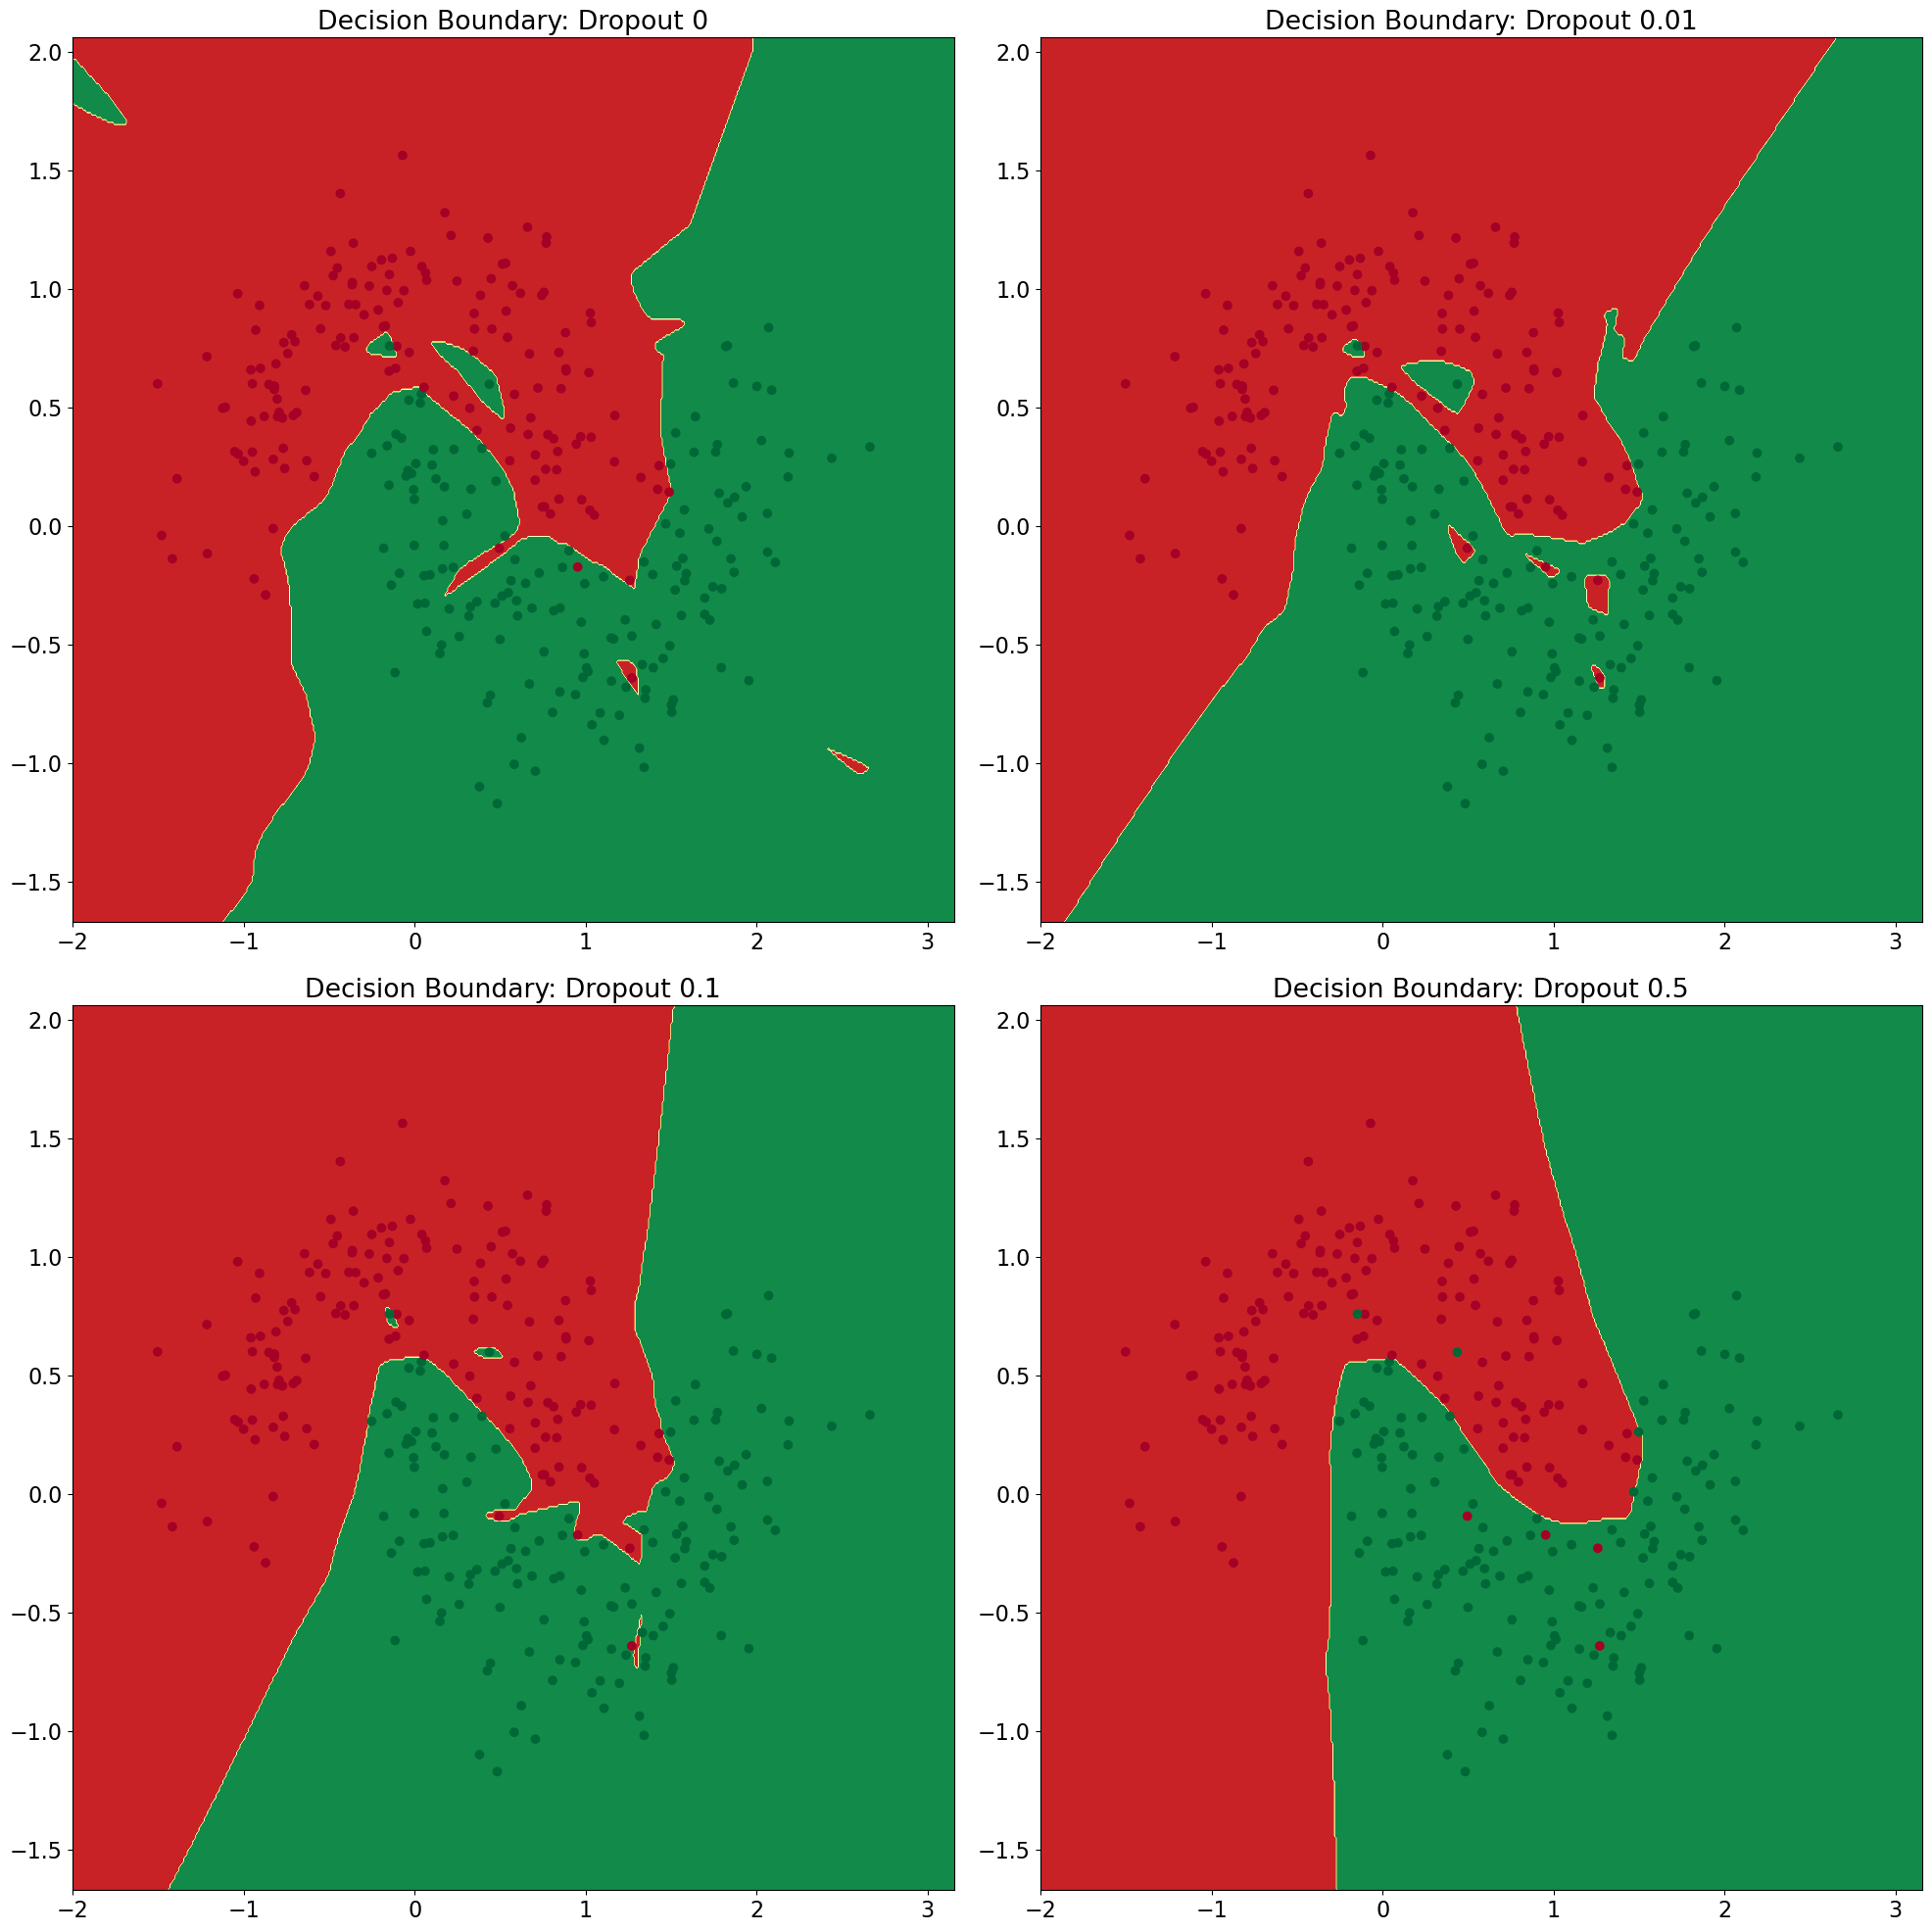

In [40]:
np.random.seed(0)

nn_input_dim = 2
nn_hdim = 20
nn_output_dim = 1
lr = 0.001 
epoch = 50000


dropout_rate_list = [0, 1e-2, 1e-1, 5e-1]
for i, dropout_rate in enumerate(dropout_rate_list):
    plt.subplot(2, 2, i+1)
    plt.title(f"Decision Boundary: Dropout {dropout_rate}")
    model = NeuralNetwork_module(nn_input_dim, nn_hdim, nn_hdim, nn_hdim, nn_output_dim, dropout_rate, init="random")
    stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=0.0, epoch=epoch, print_loss=False, momentum=0.0)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Dropout {dropout_rate} ... done")
    
plt.gcf().set_size_inches(20, 20)
plt.tight_layout()
plt.show()

#### P3.4. Optimizer (5 points)
Adjust the optimizer as follows, and plot decision boundaries and loss graph: \[Gradient Descent, Gradient Descent with Momentum].

**Observe and Analyze the effect of optimizer with repect to performance and training speed**


answer here

Learning NN: Optimizer Gradient Descent ... done
Learning NN: Optimizer Momentum ... done


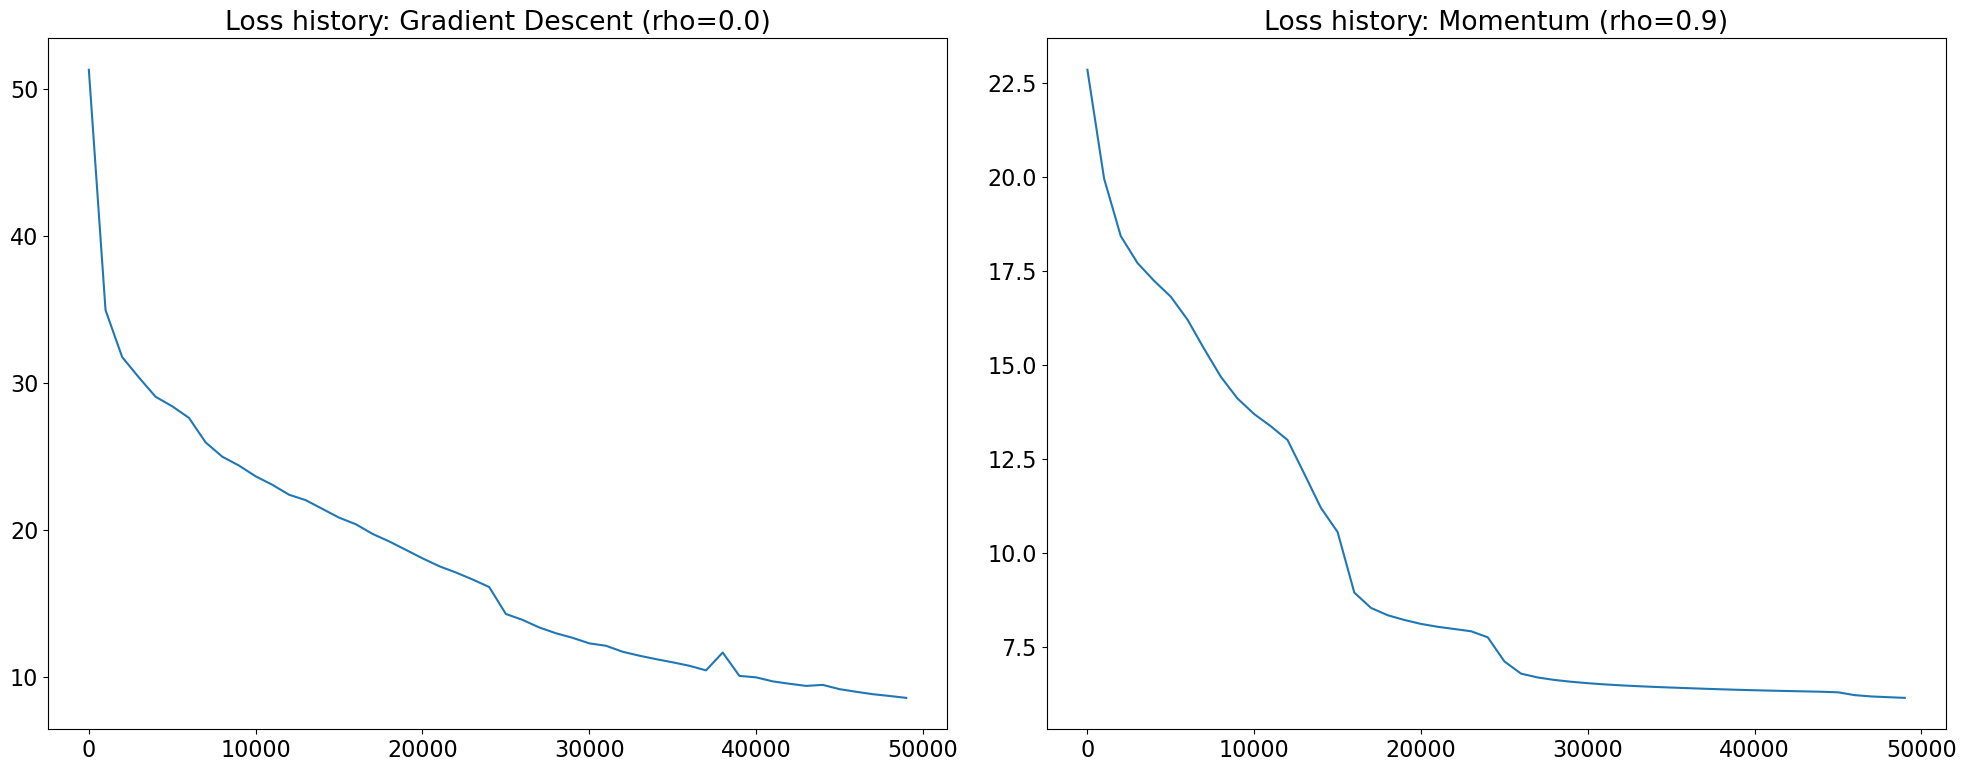

In [43]:
np.random.seed(0)

nn_input_dim = 2
nn_hdim = 10
nn_output_dim = 1
L2_norm = 0.001
lr = 0.0001 
dropout_rate = 0.0
epoch = 50000


Optimizer_list = ['Gradient Descent', 'Momentum']
for i, Optimizer in enumerate(Optimizer_list):
    momentum = 0.9 if Optimizer == 'Momentum' else 0.0
    plt.subplot(1, 2, i+1)
    plt.title(f"Loss history: {Optimizer} (rho={momentum})")
    model = NeuralNetwork_module(nn_input_dim, nn_hdim, nn_hdim, nn_hdim, nn_output_dim, dropout_rate, init="random")
    stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False, momentum=momentum)
    plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
    print(f"Learning NN: Optimizer {Optimizer} ... done")
    
plt.gcf().set_size_inches(20, 8)
plt.tight_layout()
plt.show()

---